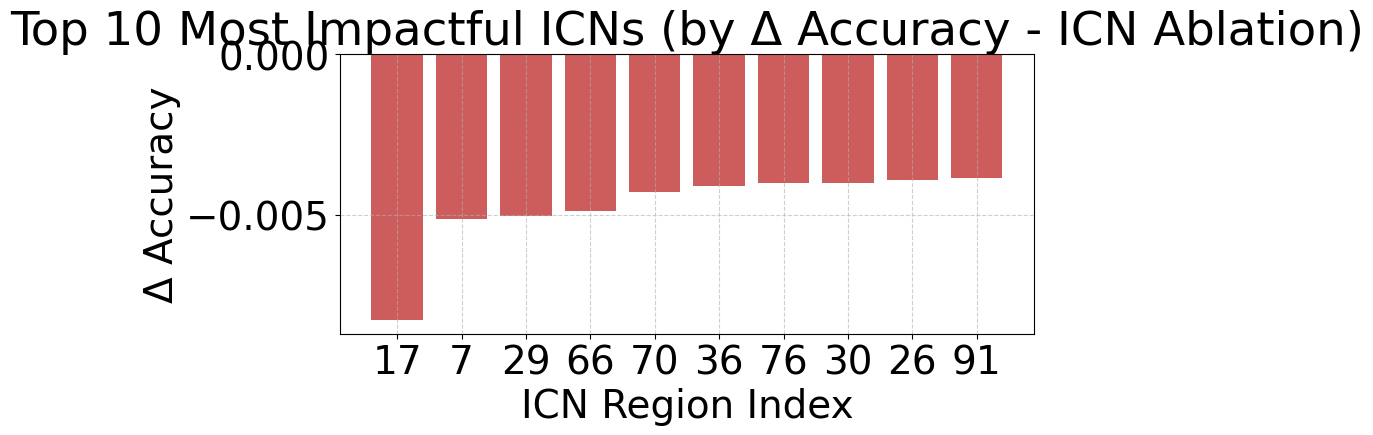

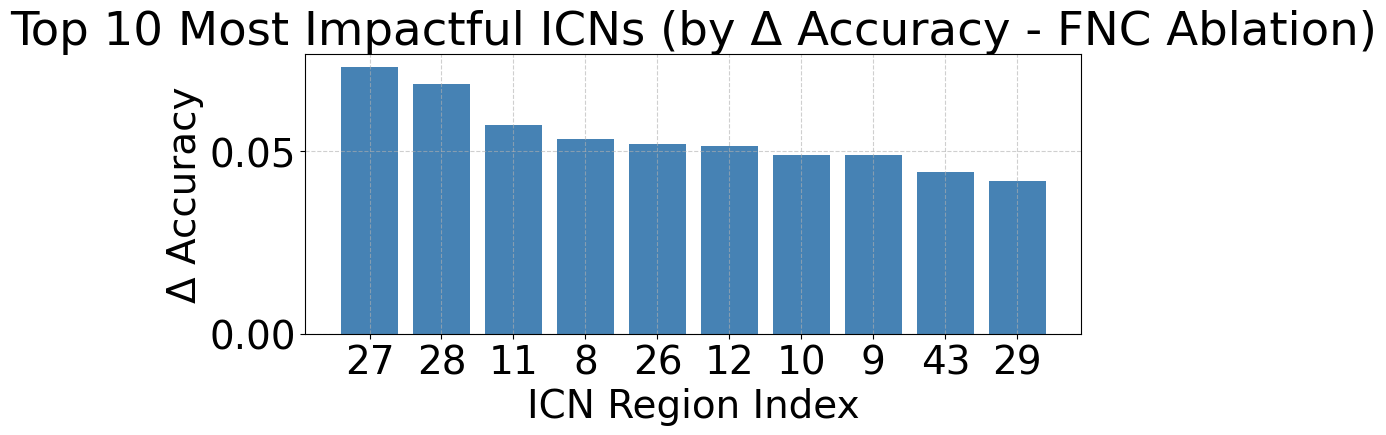

In [4]:

# ICN vs FNC Ablation Analysis Notebook

import pandas as pd
import matplotlib.pyplot as plt

# Load data
icn_path = "icn_ablation_results_valonly_normloss_multiplerandom.csv"
fnc_path = "fnc_icn_ablation_valonly_normloss_multiplerandom.csv"
gnn_path = "gnn_node_ablation_valonly_normloss_newarchitecture.csv"

df_fnc = pd.read_csv(fnc_path).rename(columns={'Region': 'ICN'})
df_gnn = pd.read_csv(gnn_path).rename(columns={'Node': 'ICN'})
df_icn = pd.read_csv(icn_path)
df = pd.merge(df_fnc, df_icn, on="ICN", suffixes=('_FNC', '_ICN'))
df = pd.merge(df, df_gnn, on="ICN", suffixes=('', '_GNN'))
df['Δ AUC Diff'] = df['Δ AUC_FNC'] - df['Δ AUC_ICN']


# Barplot: Top 10 ICN ablation by Δ Accuracy
top_icn_acc = df.sort_values(by='Δ Val Loss_ICN').head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_icn_acc['ICN'].astype(str), top_icn_acc['Δ Val Loss_ICN'], color='indianred')
plt.title('Top 10 Most Impactful ICNs (by Δ Accuracy - ICN Ablation)')
plt.xlabel('ICN Region Index')
plt.ylabel('Δ Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Barplot: Top 10 FNC ablation by Δ Accuracy
top_fnc_acc = df.sort_values(by='Δ Accuracy_FNC', ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_fnc_acc['ICN'].astype(str), top_fnc_acc['Δ Accuracy_FNC'], color='steelblue')
plt.title('Top 10 Most Impactful ICNs (by Δ Accuracy - FNC Ablation)')
plt.xlabel('ICN Region Index')
plt.ylabel('Δ Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


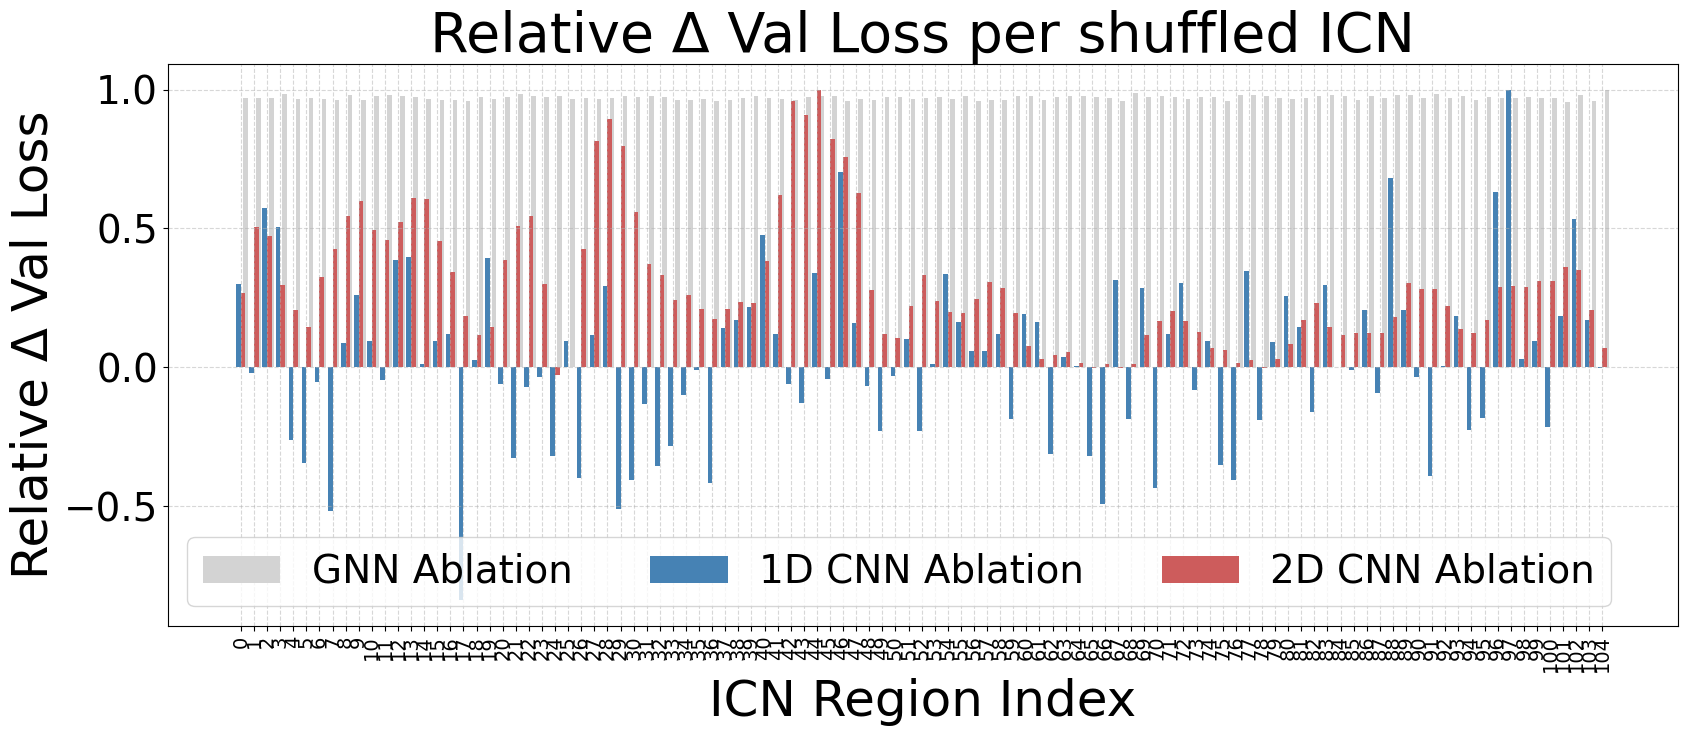

In [5]:
import numpy as np

# Sort by ICN index for consistent plotting
df_sorted = df.sort_values(by="ICN")
# Normalize Δ Val Loss columns by their maximum absolute value
df_sorted['Δ Val Loss_ICN_norm'] = df_sorted['Δ Val Loss_ICN'] / df_sorted['Δ Val Loss_ICN'].max()
df_sorted['Δ Val Loss_FNC_norm'] = df_sorted['Δ Val Loss_FNC'] / df_sorted['Δ Val Loss_FNC'].max()
df_sorted['Δ Val Loss_GNN_norm'] = df_sorted['Δ Val Loss'] / df_sorted['Δ Val Loss'].max()

x = np.arange(len(df_sorted))  # the label locations
width = 0.35  # the width of the bars

plt.rcParams.update({'font.size': 28})  # Set global font size larger

fig, ax = plt.subplots(figsize=(18, 8))  # Increase height, keep width
bars3 = ax.bar(x + width, df_sorted['Δ Val Loss_GNN_norm'], width, label='GNN Ablation', color='lightgray')

bars1 = ax.bar(x - width/2, df_sorted['Δ Val Loss_ICN_norm'], width, label='1D CNN Ablation', color='steelblue')
bars2 = ax.bar(x + width/2, df_sorted['Δ Val Loss_FNC_norm'], width, label='2D CNN Ablation', color='indianred')

ax.set_xlabel('ICN Region Index', fontsize=36)
ax.set_ylabel('Relative Δ Val Loss', fontsize=36)
ax.set_title('Relative Δ Val Loss per shuffled ICN', fontsize=40)
ax.set_xticks(x)

# Show every 4th label, blank others for clarity
step = 1
labels = df_sorted['ICN'].astype(str)
ax.set_xticklabels(labels, rotation=90, ha='center', fontsize=14)

ax.legend(loc='lower left', ncol=3, fontsize=28)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [6]:
# Calculate how many regions correspond to the top 5%
top_percent = 0.05
n_regions = len(df_sorted)
n_top = max(1, int(np.ceil(n_regions * top_percent)))

# Get indices for each model
top_icn_idx = df_sorted['Δ Val Loss_ICN_norm'].nlargest(n_top).index.tolist()
top_fnc_idx = df_sorted['Δ Val Loss_FNC_norm'].nlargest(n_top).index.tolist()
top_gnn_idx = df_sorted['Δ Val Loss_GNN_norm'].nlargest(n_top).index.tolist()

# If you want the actual ICN region indices (not DataFrame indices):
top_icn_regions = df_sorted.loc[top_icn_idx, 'ICN'].tolist()
top_fnc_regions = df_sorted.loc[top_fnc_idx, 'ICN'].tolist()
top_gnn_regions = df_sorted.loc[top_gnn_idx, 'ICN'].tolist()

print("Top 5% ICN regions by Δ Val Loss (1D CNN):", top_icn_regions)
print("Top 5% ICN regions by Δ Val Loss (2D CNN):", top_fnc_regions)
print("Top 5% ICN regions by Δ Val Loss (GNN):", top_gnn_regions)

Top 5% ICN regions by Δ Val Loss (1D CNN): [97, 46, 88, 96, 2, 102]
Top 5% ICN regions by Δ Val Loss (2D CNN): [44, 42, 43, 28, 45, 27]
Top 5% ICN regions by Δ Val Loss (GNN): [104, 68, 3, 21, 91, 11]


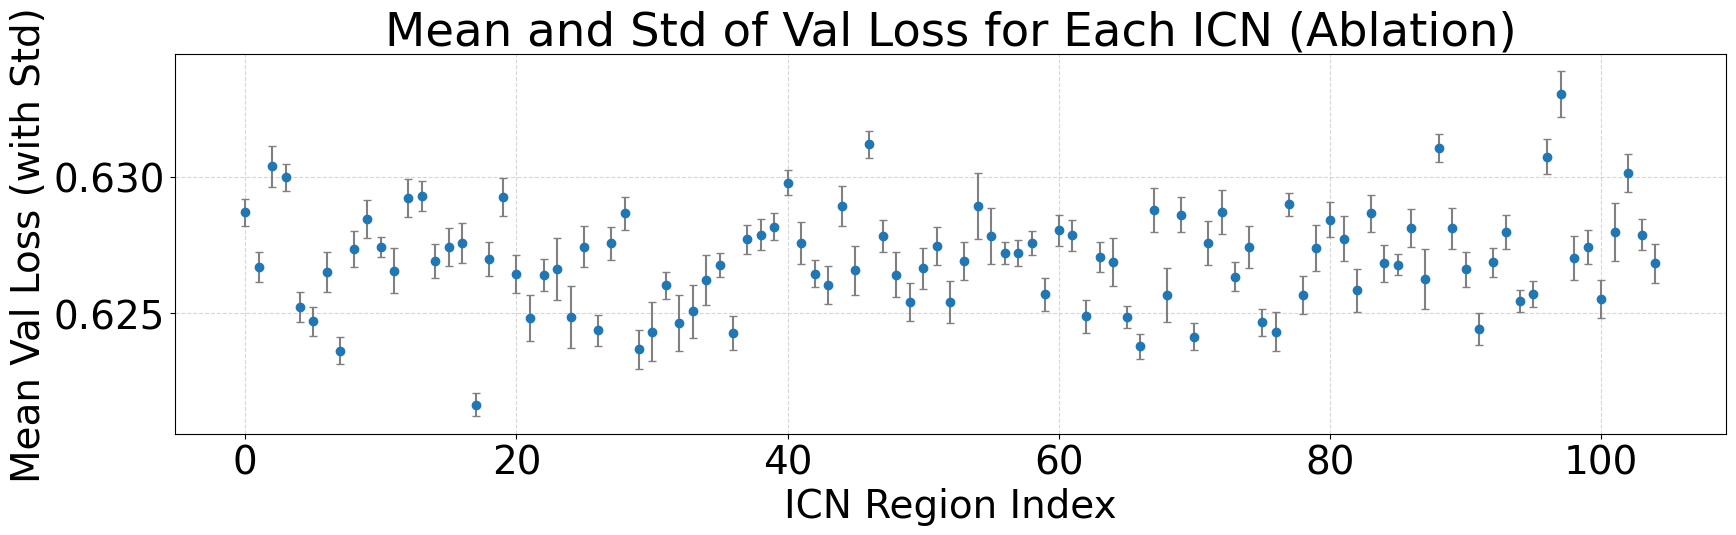

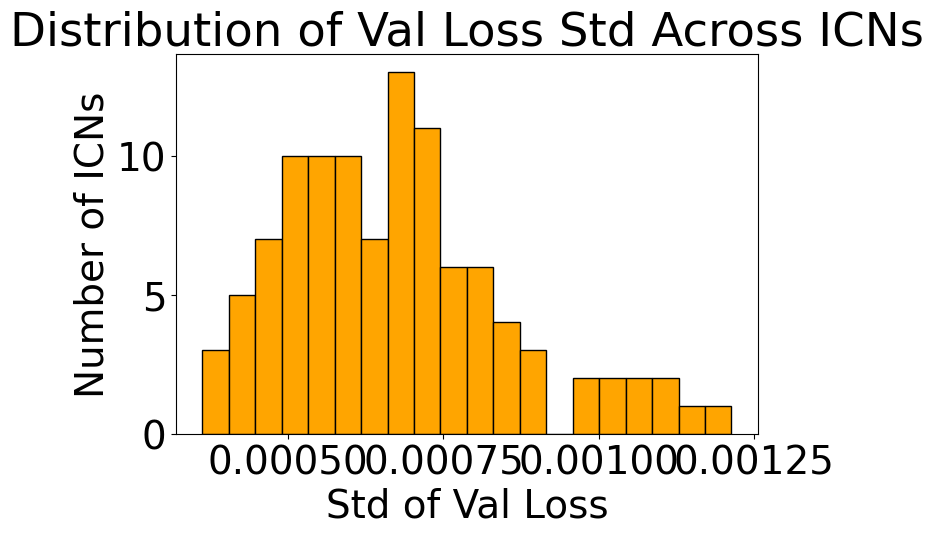

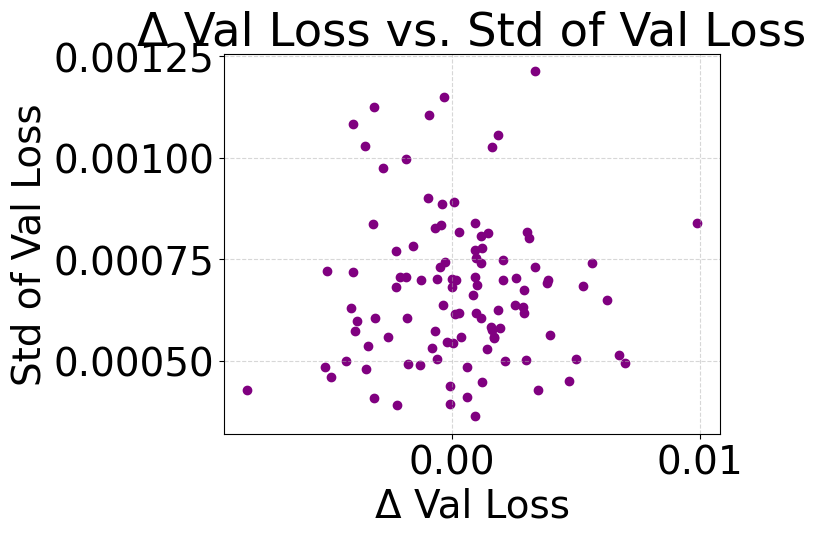

Top 10 ICNs by Val Loss Variance:
    ICN  val_loss_var  val_loss_mean  Δ Val Loss
13   54  1.471756e-06       0.628921    0.003324
63   23  1.320830e-06       0.626623   -0.000342
89   24  1.267537e-06       0.624863   -0.003150
73   87  1.221689e-06       0.626260   -0.000921
97   30  1.171644e-06       0.624318   -0.004019
27  101  1.116825e-06       0.627985    0.001831
94   32  1.060190e-06       0.624636   -0.003511
31   55  1.054212e-06       0.627847    0.001611
80   68  9.936334e-07       0.625673   -0.001858
87   33  9.492572e-07       0.625077   -0.002809
ICNs with most significant ablation effect (lowest p-values):
     ICN  val_loss_mean  val_loss_std  val_loss_pval
101   66       0.623778      0.000460   1.923721e-64
59    85       0.626778      0.000393   4.658059e-64
96    26       0.624370      0.000574   6.776337e-64
43    10       0.627422      0.000362   8.819448e-64
83    94       0.625445      0.000391   1.257796e-63
6      3       0.629978      0.000503   2.01629

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the ablation results
df_ablation = pd.read_csv("icn_ablation_results_valonly_normloss_multiplerandom.csv")

# Example 1: Plot mean and std of Δ Val Loss for each ICN
plt.figure(figsize=(18, 6))
plt.errorbar(df_ablation['ICN'], df_ablation['val_loss_mean'], yerr=df_ablation['val_loss_std'], fmt='o', ecolor='gray', capsize=3)
plt.xlabel('ICN Region Index')
plt.ylabel('Mean Val Loss (with Std)')
plt.title('Mean and Std of Val Loss for Each ICN (Ablation)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Example 2: Histogram of std of Δ Val Loss (to see which ICNs are most variable)
plt.figure(figsize=(8, 6))
plt.hist(df_ablation['val_loss_std'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Std of Val Loss')
plt.ylabel('Number of ICNs')
plt.title('Distribution of Val Loss Std Across ICNs')
plt.tight_layout()
plt.show()

# Example 3: Scatter plot of Δ Val Loss vs. its std (to see if high effect = high variance)
plt.figure(figsize=(8, 6))
plt.scatter(df_ablation['Δ Val Loss'], df_ablation['val_loss_std'], c='purple')
plt.xlabel('Δ Val Loss')
plt.ylabel('Std of Val Loss')
plt.title('Δ Val Loss vs. Std of Val Loss')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Example 4: Print ICNs with highest variance in Val Loss
top_var = df_ablation.sort_values(by='val_loss_var', ascending=False).head(10)
print("Top 10 ICNs by Val Loss Variance:")
print(top_var[['ICN', 'val_loss_var', 'val_loss_mean', 'Δ Val Loss']])

# Example 5: Print ICNs with lowest p-value for t-test (if you want to do significance testing)
from scipy.stats import ttest_1samp

# Suppose you want to test if the ablation mean is significantly different from baseline (mean=baseline)
baseline_val_loss = 0  # If you want to test against zero change, or use baseline_avg['val_loss']
pvals = []
for i, row in df_ablation.iterrows():
    # Simulate NUM_REPEATS samples from mean and std (or use your actual samples if you saved them)
    samples = np.random.normal(row['val_loss_mean'], row['val_loss_std'], size=20)
    tstat, pval = ttest_1samp(samples, baseline_val_loss)
    pvals.append(pval)
df_ablation['val_loss_pval'] = pvals

print("ICNs with most significant ablation effect (lowest p-values):")
print(df_ablation.sort_values(by='val_loss_pval').head(10)[['ICN', 'val_loss_mean', 'val_loss_std', 'val_loss_pval']])

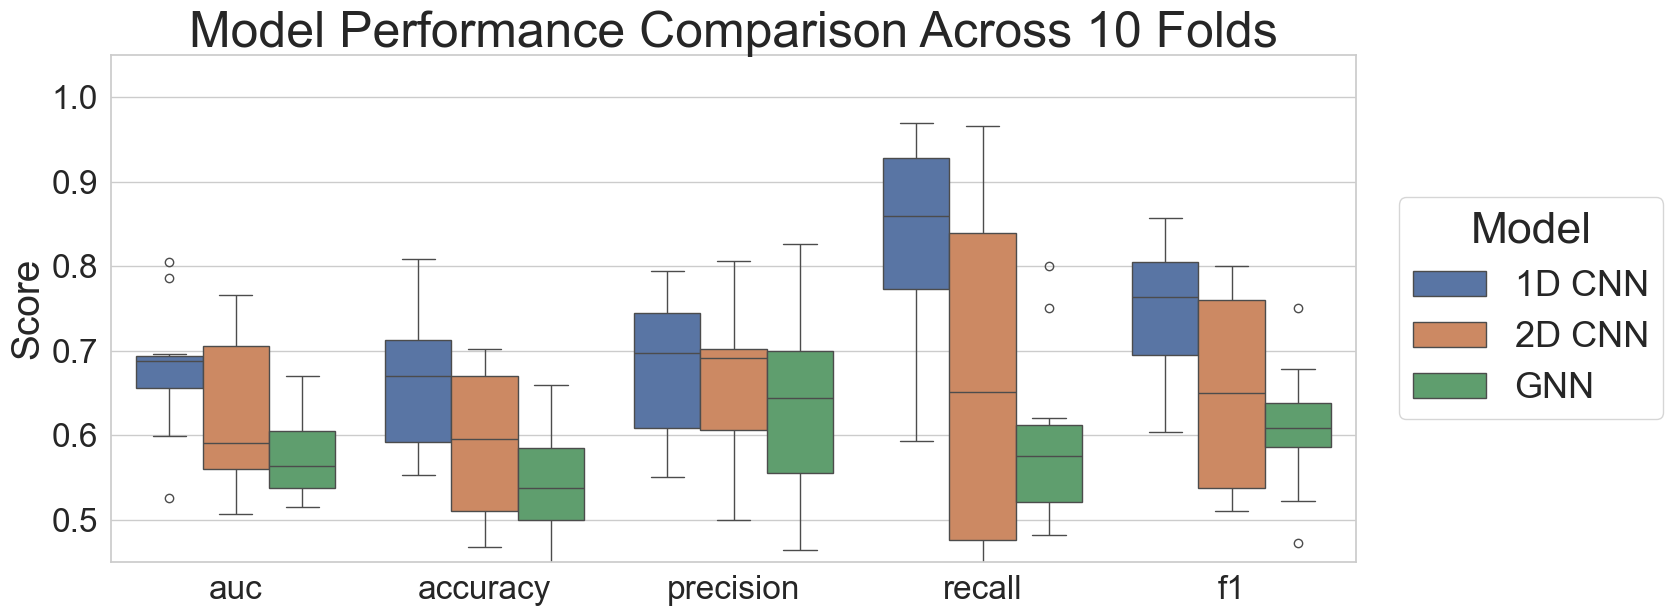

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSVs
df_1d = pd.read_csv("fold_results_1DCNN.csv")
df_2d = pd.read_csv("baseline_fold_results_2dcnn.csv")
df_gnn = pd.read_csv("GNN_fold_results.csv")

# Add model labels
df_1d["Model"] = "1D CNN"
df_2d["Model"] = "2D CNN"
df_gnn["Model"] = "GNN"

# Concatenate all results
df_all = pd.concat([df_1d, df_2d, df_gnn], ignore_index=True)

# Melt the dataframe for seaborn
df_melted = pd.melt(df_all, id_vars=["Model"], 
                    value_vars=["auc", "accuracy", "precision", "recall", "f1"],
                    var_name="Metric", value_name="Score")

# Set seaborn style
sns.set(style="whitegrid", font_scale=1.5)

# Create the boxplot
plt.figure(figsize=(14, 6.5))
sns.boxplot(x="Metric", y="Score", hue="Model", data=df_melted)

# Customize plot
plt.title("Model Performance Comparison Across 10 Folds", fontsize=36)
plt.ylabel("Score", fontsize=28)
plt.xlabel("", fontsize=28)
plt.ylim(0.45, 1.05)
plt.legend(title="Model", loc="upper right", fontsize=26, title_fontsize=32)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
plt.legend(
    title="Model",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=26,
    title_fontsize=32
)
# Show or save
plt.show()
# plt.savefig("ModelComparisonEvaluation.png", dpi=300)

